1. load data:

Data source: Kaggle

Data link: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_file_path = '/content/drive/MyDrive/customer chrun prediction/Customer-Churn-Records.csv'

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv(data_file_path)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


2. data exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

the dataset contains 10000 samples, 17 features, 1 Label. From data, Exited is the label.

2.1 check data balance:

In [5]:
n = data['Exited'].value_counts()
print(n)

0    7962
1    2038
Name: Exited, dtype: int64


The data is not balanced

2.2 unique values:

In [6]:
data.nunique()

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

2.3 feature exploration:

based on the data card on kaggle:

RowNumber—corresponds to the record (row) number and has no effect on the output.
CustomerId—contains random values and has no effect on customer leaving the bank.

Surname—the surname of a customer has no impact on their decision to leave the bank.

CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

Geography—a customer’s location can affect their decision to leave the bank.


Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.

Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

NumOfProducts—refers to the number of products that a customer has purchased through the bank.

HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

IsActiveMember—active customers are less likely to leave the bank.

EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

Exited—whether or not the customer left the bank.

Complain—customer has complaint or not.
Satisfaction Score—Score provided by the customer for their complaint resolution.
Card Type—type of card hold by the customer.

Points Earned—the points earned by the customer for using credit card.

can make a conclusion:

1. contunuous data (x): CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary, Points Earned

2. discrete data (x): Geography,Gender, HasCrCard, IsActiveMember, Complain

3. unrelevent data (x): RowNumber , CustomerId , Surname

4. (y): Exited (discrete data)

In [7]:
data[["CreditScore","Age","Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Point Earned" ]].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,1000.000000


<Axes: xlabel='Exited', ylabel='Point Earned'>

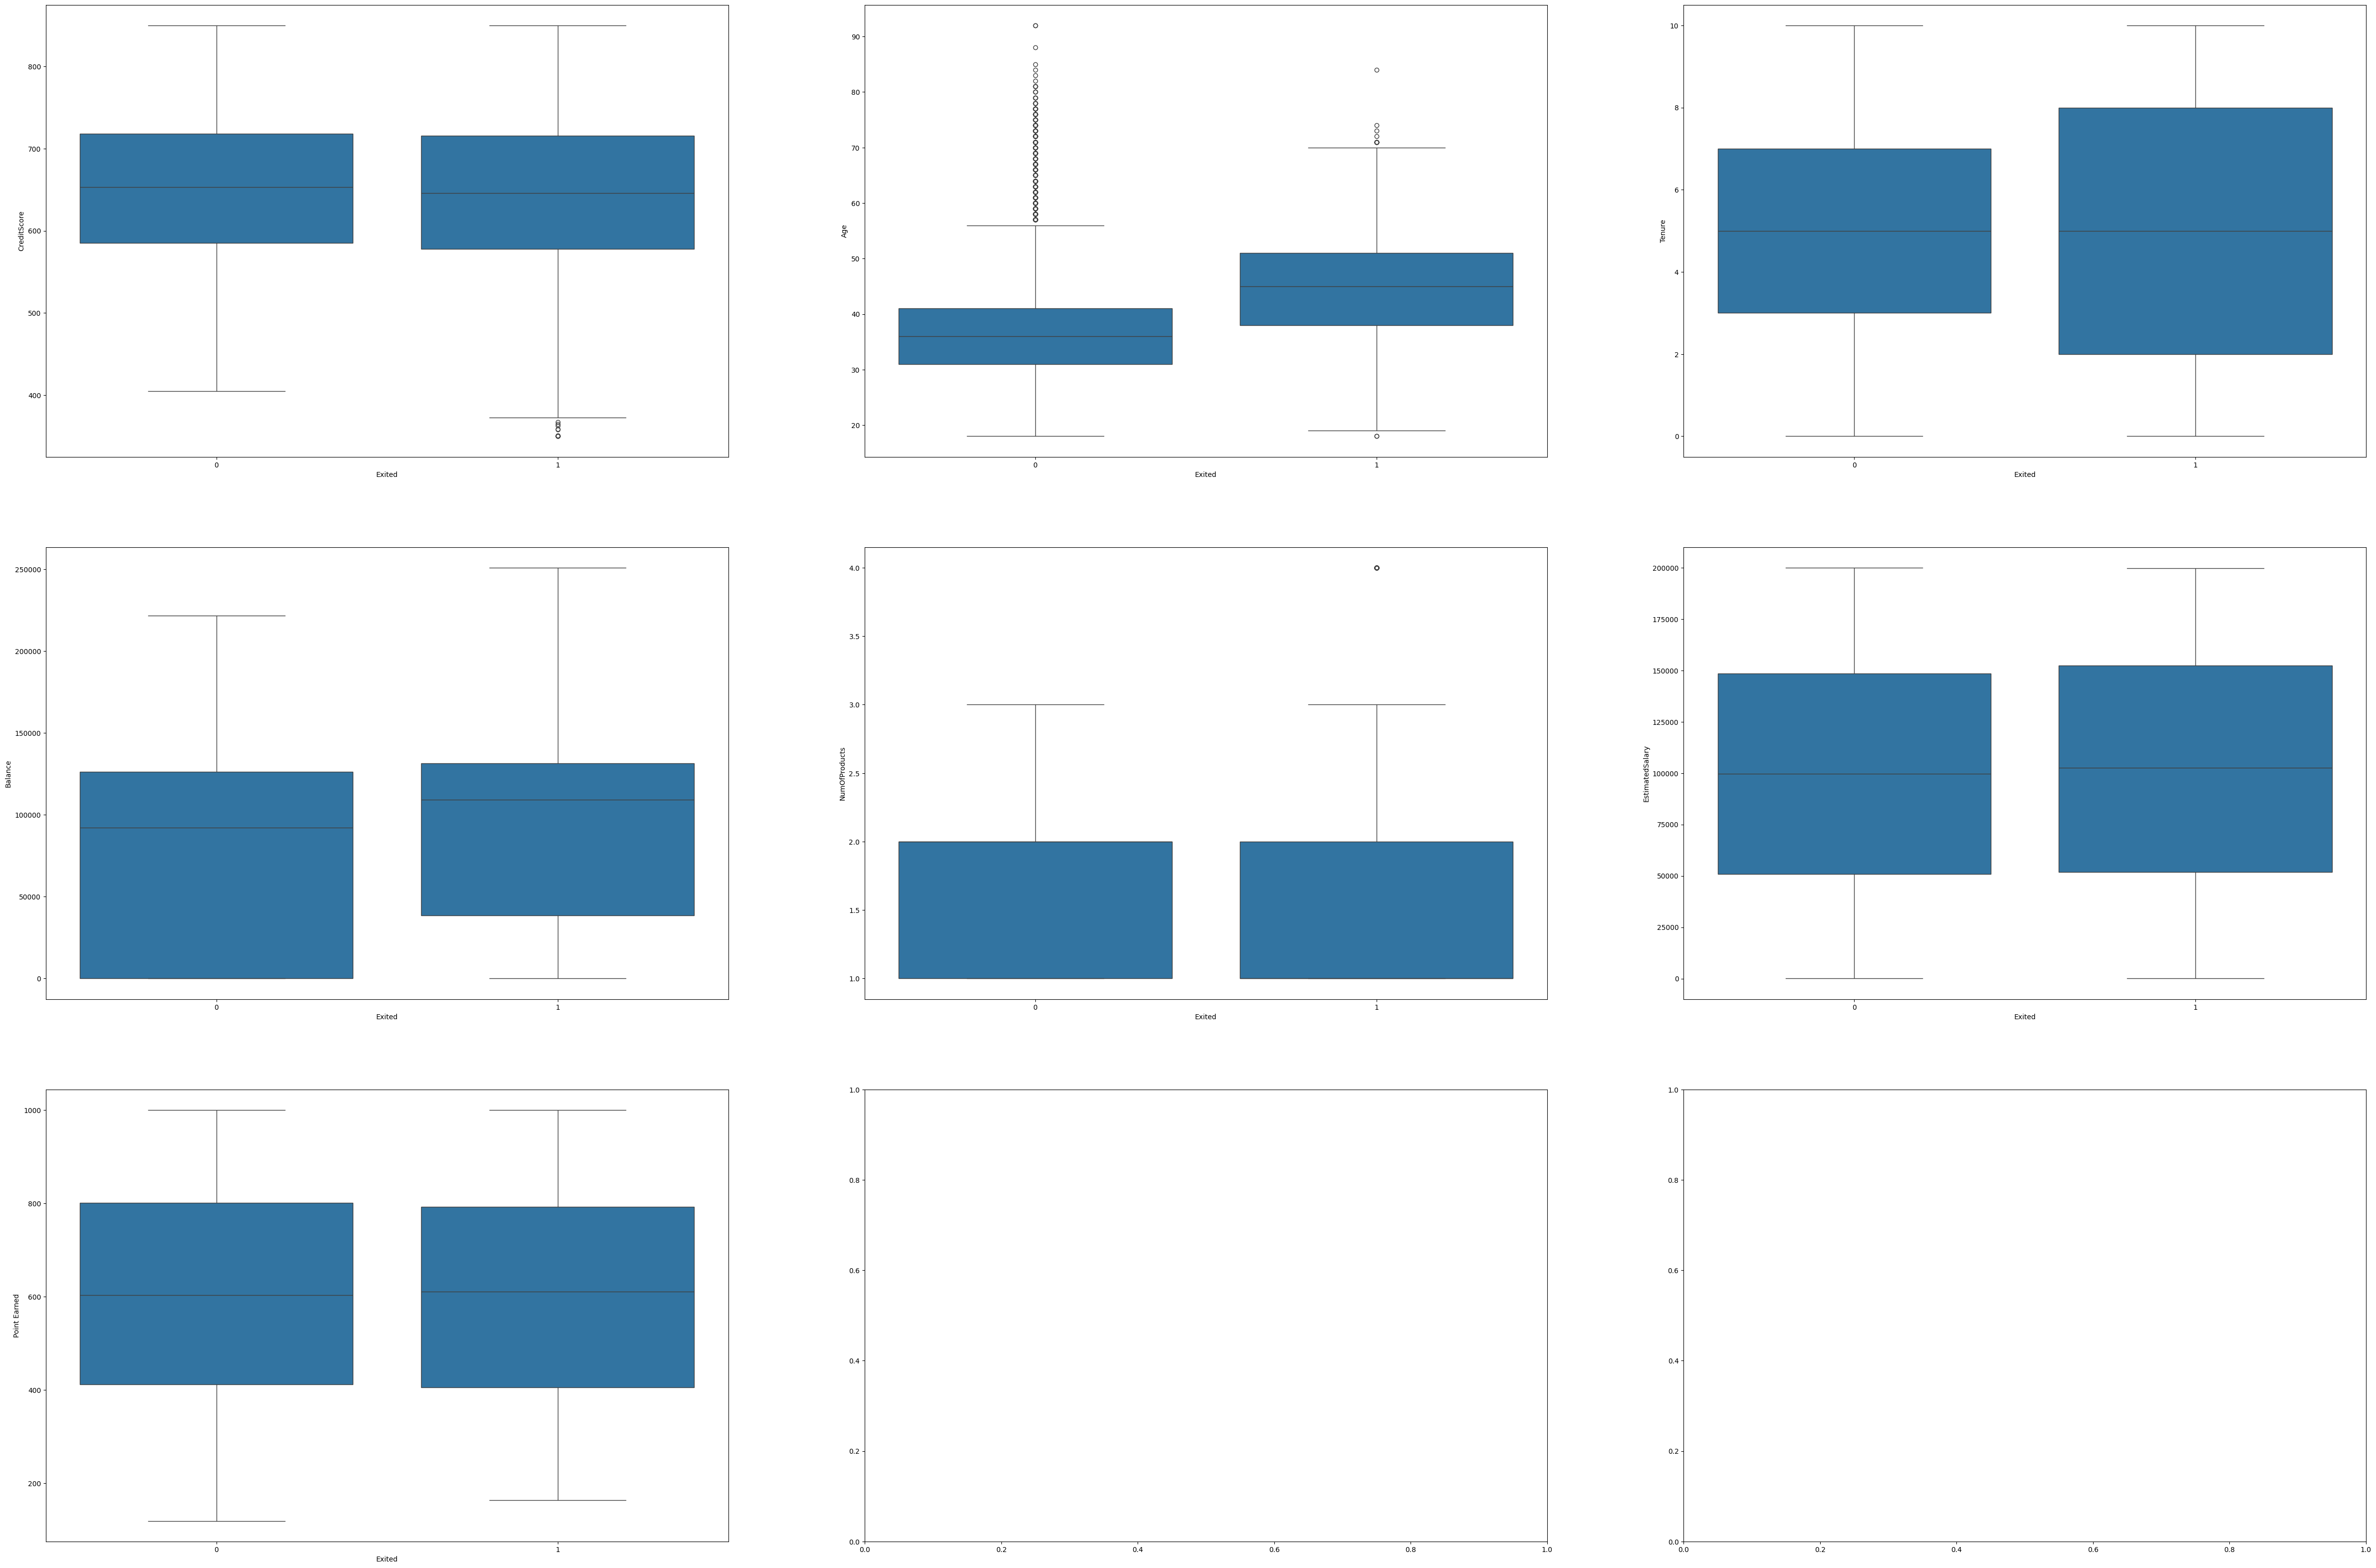

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
_,axss = plt.subplots(3,3, figsize=[60,40])
sns.boxplot(data=data, x="Exited",y = "CreditScore", ax=axss[0,0])
sns.boxplot(data=data, x="Exited",y = "Age", ax=axss[0,1])
sns.boxplot(data=data, x="Exited",y = "Tenure", ax=axss[0,2])
sns.boxplot(data=data, x="Exited",y = "Balance", ax=axss[1,0])
sns.boxplot(data=data, x="Exited",y = "NumOfProducts", ax=axss[1,1])
sns.boxplot(data=data, x="Exited",y = "EstimatedSalary", ax=axss[1,2])
sns.boxplot(data=data, x="Exited",y = "Point Earned", ax=axss[2,0])

<Axes: xlabel='Exited', ylabel='count'>

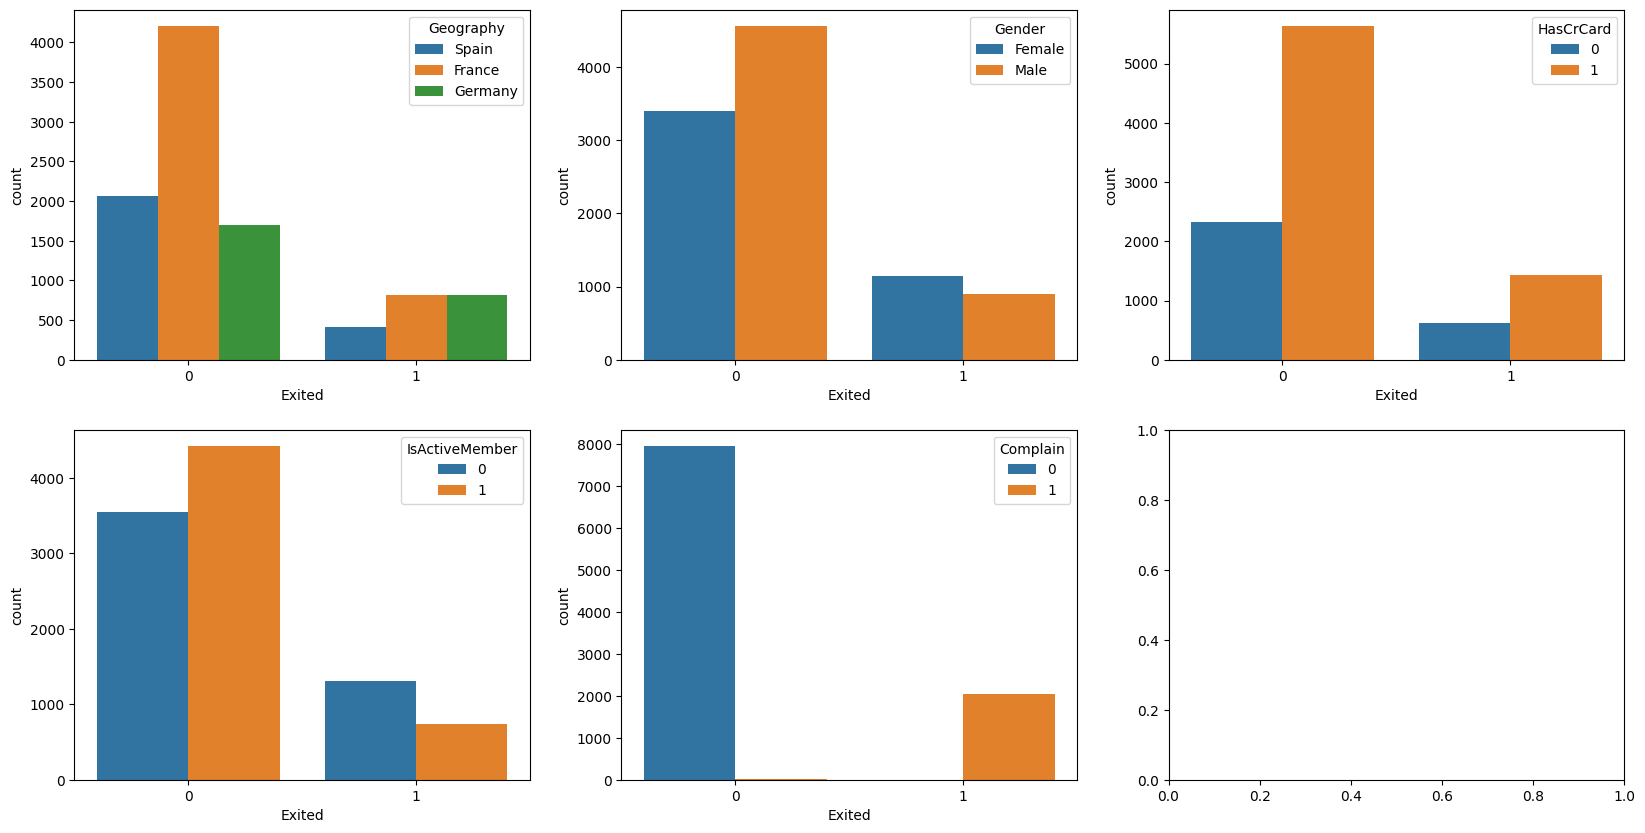

In [9]:
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=data, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=data, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=data, ax=axss[0][2])
sns.countplot(x='Exited', hue='IsActiveMember', data=data, ax=axss[1][0])
sns.countplot(x='Exited', hue='Complain', data=data, ax=axss[1][1])

3. data preprocessing

In [10]:
Y = data['Exited']
x_drop_para = ["RowNumber", "CustomerId", "Surname", "Exited"]
X = data.drop(x_drop_para, axis=1)

In [11]:
X.head() # has four more features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


In [12]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [13]:
cat_cols = X.columns[X.dtypes == 'object']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

In [14]:
num_cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score',
       'Point Earned'],
      dtype='object')

In [15]:
cat_cols

Index(['Geography', 'Gender', 'Card Type'], dtype='object')

In [16]:
data[cat_cols].nunique()

Geography    3
Gender       2
Card Type    4
dtype: int64

In [17]:
cat_cols = cat_cols.tolist()
num_cols = num_cols.tolist()
print(cat_cols)
print(num_cols)

['Geography', 'Gender', 'Card Type']
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Point Earned']


In [18]:
wrong_cols = ['IsActiveMember', 'HasCrCard', 'Complain']
for col in wrong_cols:
  cat_cols.append(col)

for col in wrong_cols:
  num_cols.remove(col)

cat_cols = pd.Index(cat_cols)
num_cols = pd.Index(num_cols)

In [19]:
print(cat_cols)
print(num_cols)

Index(['Geography', 'Gender', 'Card Type', 'IsActiveMember', 'HasCrCard',
       'Complain'],
      dtype='object')
Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Satisfaction Score', 'Point Earned'],
      dtype='object')


Split data:

In [20]:
from sklearn import model_selection

In [21]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, stratify = Y, random_state = 143)
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 8000 observation with 14 features
test data has 2000 observation with 14 features


In [22]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
3766,584,Spain,Male,36,4,82696.09,2,0,0,83058.14,0,5,PLATINUM,925
3475,769,France,Male,31,4,61297.05,2,1,1,7118.02,0,4,DIAMOND,311
8562,697,France,Male,63,7,148368.02,1,0,0,118862.08,1,5,DIAMOND,505
9054,546,France,Female,30,5,0.00,2,0,1,198543.09,0,4,DIAMOND,808
5360,633,France,Male,35,10,0.00,2,1,0,65675.47,0,1,DIAMOND,898


In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
def OneHotEncoding(df, enc, categories):
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns = enc.get_feature_names_out(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

In [25]:
categories = ['Geography','Card Type']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])
X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

In [26]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,584,Male,36,4,82696.09,2,0,0,83058.14,0,5,925,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,769,Male,31,4,61297.05,2,1,1,7118.02,0,4,311,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,697,Male,63,7,148368.02,1,0,0,118862.08,1,5,505,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,546,Female,30,5,0.00,2,0,1,198543.09,0,4,808,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,633,Male,35,10,0.00,2,1,0,65675.47,0,1,898,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [27]:
# Ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
categories = ['Gender']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[categories])
X_train[categories] = enc_oe.transform(X_train[categories])
X_test[categories] = enc_oe.transform(X_test[categories])

In [28]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,584,1.0,36,4,82696.09,2,0,0,83058.14,0,5,925,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,769,1.0,31,4,61297.05,2,1,1,7118.02,0,4,311,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,697,1.0,63,7,148368.02,1,0,0,118862.08,1,5,505,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,546,0.0,30,5,0.00,2,0,1,198543.09,0,4,808,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,633,1.0,35,10,0.00,2,1,0,65675.47,0,1,898,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Normalize Data:

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [30]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,-0.682095,1.0,-0.274418,-0.361047,0.098170,0.807799,0,0,-0.295508,0,1.415352,1.415724,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.224158,1.0,-0.752248,-0.361047,-0.245002,0.807799,1,1,-1.619043,0,0.703762,-1.315348,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.482265,1.0,2.305864,0.677315,1.151336,-0.905455,0,0,0.328508,1,1.415352,-0.452436,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.073649,0.0,-0.847814,-0.014926,-1.228009,0.807799,0,1,1.717242,0,0.703762,0.895308,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.177195,1.0,-0.369984,1.715678,-1.228009,0.807799,1,0,-0.598465,0,-1.431007,1.295628,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Model training

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
classifier_logistic = LogisticRegression()
classifier_KNN = KNeighborsClassifier()
classifier_RF = RandomForestClassifier()

In [32]:
from sklearn.metrics import accuracy_score
classifier_logistic.fit(X_train, y_train)
y_test_LG = classifier_logistic.predict(X_test)
accuracy_score(y_test, y_test_LG)

0.999

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix_LG = confusion_matrix(y_test, y_test_LG)
print(confusion_matrix_LG)

[[1592    0]
 [   2  406]]


In [34]:
classifier_KNN.fit(X_train, y_train)
y_test_KNN = classifier_KNN.predict(X_test)
accuracy_score(y_test, y_test_KNN)

0.9225

In [35]:
confusion_matrix_KNN = confusion_matrix(y_test, y_test_KNN)
print(confusion_matrix_KNN)

[[1581   11]
 [ 144  264]]


In [36]:
classifier_RF.fit(X_train, y_train)
y_test_RF = classifier_RF.predict(X_test)
accuracy_score(y_test, y_test_RF)

0.999

In [37]:
confusion_matrix_KNN = confusion_matrix(y_test, y_test_RF)
print(confusion_matrix_KNN)

[[1592    0]
 [   2  406]]


Since KNN and LG already reach 99% accuracy, only RF need to be tuned. Lets try grid search

In [42]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_neighbors':[1,3,5,7,9,10,12,14,16]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 10, 12, 14, 16]})

In [43]:
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

print_grid_search_metrics(Grid_KNN)

Best score: 0.9215
Best parameters set:
n_neighbors:9


In [44]:
best_KNN_model = Grid_KNN.best_estimator_
y_test_best_KNN = best_KNN_model.predict(X_test)
accuracy_score(y_test, y_test_best_KNN)

0.9165

Lets print out all the outcome for all models:

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    f1_score = 2 * precision * recall / (precision + recall)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ("f1_score is: " + str(f1_score))
    print ()

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [48]:
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,classifier_RF.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,classifier_logistic.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, classifier_KNN.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.999
precision is: 1.0
recall is: 0.9950980392156863
f1_score is: 0.9975429975429976

Logistic Regression
Accuracy is: 0.999
precision is: 1.0
recall is: 0.9950980392156863
f1_score is: 0.9975429975429976

K nearest neighbor
Accuracy is: 0.9225
precision is: 0.96
recall is: 0.6470588235294118
f1_score is: 0.773060029282577



ROC:

In [55]:
from sklearn.metrics import roc_curve
from sklearn import metrics

In [56]:
y_pred_lg_pro = classifier_logistic.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_lg_pro)
classifier_logistic.predict_proba(X_test)

array([[2.02046477e-02, 9.79795352e-01],
       [9.99358631e-01, 6.41368754e-04],
       [9.99427699e-01, 5.72300906e-04],
       ...,
       [4.12713022e-03, 9.95872870e-01],
       [1.14291452e-02, 9.88570855e-01],
       [9.98569320e-01, 1.43068016e-03]])

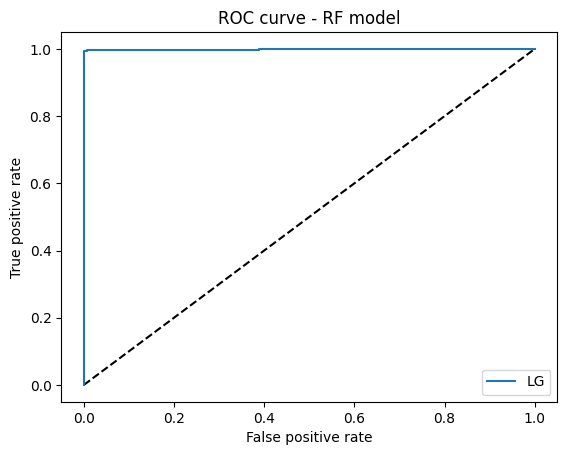

In [57]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='LG')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

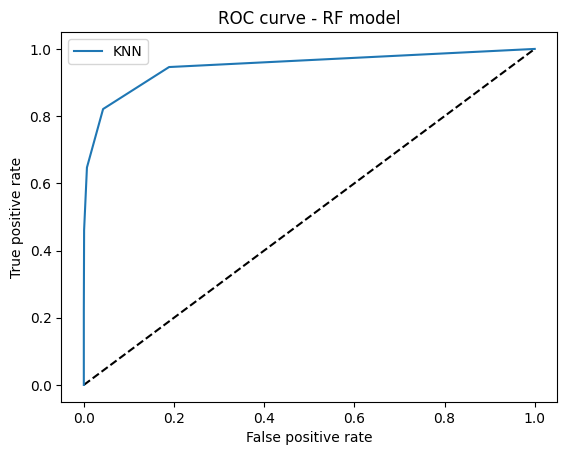

In [58]:
y_pred_KNN_pro = classifier_KNN.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_KNN_pro)
classifier_KNN.predict_proba(X_test)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

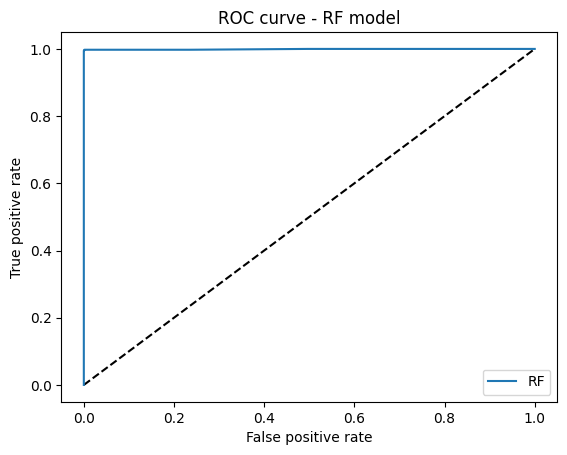

In [59]:
y_pred_RF_pro = classifier_RF.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_RF_pro)
classifier_RF.predict_proba(X_test)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()